In [25]:
from helper import Helper
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, Activation, MaxPool2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.optimizers import Adam, RMSprop, SGD
from tensorflow.keras.losses import CategoricalCrossentropy
from time import time
from sklearn.metrics import accuracy_score, classification_report
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [26]:
h = Helper()

In [27]:
train_it, validation_it, test_it = h.construct_data_generator_w_validation()

Found 22050 images belonging to 3 classes.
Found 3150 images belonging to 3 classes.
Found 6300 images belonging to 3 classes.


data/train/018071.png


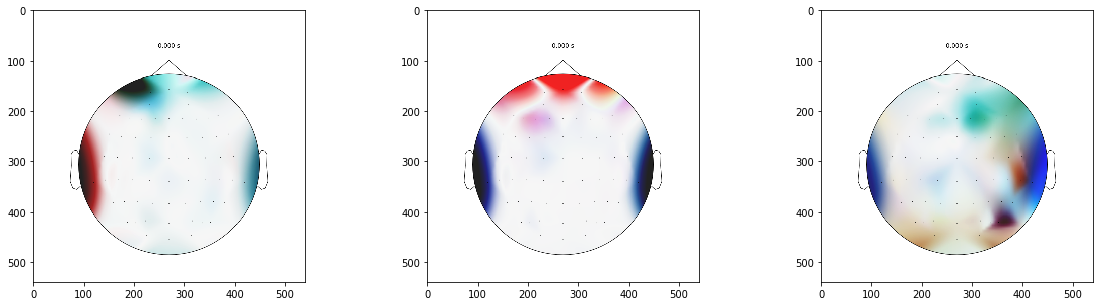

In [28]:
h.plot_examples()

data/test/021874.png


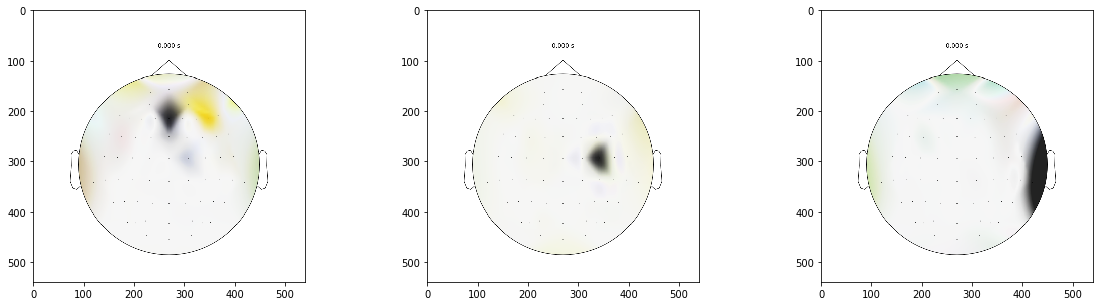

In [29]:
h.plot_examples('test')

In [30]:
def build_model(optimizer, loss, name):
    model = Sequential(name=name)
    
    model.add(Conv2D(16, (5,5), padding = 'same', input_shape = (224, 224, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides = (2,2)))
    model.add(Conv2D(32, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides =(2,2)))
    model.add(Conv2D(64, (5,5), padding = 'same', activation = 'relu'))
    model.add(MaxPool2D(pool_size = (2,2), strides =(2,2)))
    model.add(Dropout(0.5))
    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.5))
    model.add(Dense(3, activation = 'softmax'))
    
    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])
    model.summary()
    
    return model

In [31]:
opt = Adam(learning_rate=0.0001)
loss = 'categorical_crossentropy'

In [32]:
tblog_path = h.logs_directory.format(time())
tb_log = TensorBoard(log_dir = tblog_path, profile_batch=0)

In [41]:
model = build_model(opt, loss, 'cnn_topomap_classification_model_150_2by2')

Model: "cnn_topomap_classification_model_150_2by2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 224, 224, 16)      1216      
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 112, 112, 32)      12832     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 56, 56, 64)        51264     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 28, 28, 64)        0         
_________________________________________________________________
dropout_10 (Dropout)     

In [ ]:
r = model.fit_generator(train_it, epochs=150, callbacks=[tb_log], validation_data=validation_it)

Epoch 1/150
173/173 [==============================] - 118s 683ms/step - loss: 1.0887 - accuracy: 0.3794 - val_loss: 1.0548 - val_accuracy: 0.4663
Epoch 2/150
173/173 [==============================] - 112s 649ms/step - loss: 1.0064 - accuracy: 0.4917 - val_loss: 0.9412 - val_accuracy: 0.5514
Epoch 3/150
173/173 [==============================] - 112s 646ms/step - loss: 0.8992 - accuracy: 0.5702 - val_loss: 0.8255 - val_accuracy: 0.6225
Epoch 4/150
173/173 [==============================] - 112s 646ms/step - loss: 0.8117 - accuracy: 0.6271 - val_loss: 0.7236 - val_accuracy: 0.6898
Epoch 5/150
173/173 [==============================] - 112s 646ms/step - loss: 0.7438 - accuracy: 0.6634 - val_loss: 0.6552 - val_accuracy: 0.7149
Epoch 6/150
173/173 [==============================] - 112s 646ms/step - loss: 0.6878 - accuracy: 0.6920 - val_loss: 0.6114 - val_accuracy: 0.7419
Epoch 7/150
173/173 [==============================] - 112s 647ms/step - loss: 0.6486 - accuracy: 0.7129 - val_loss: 0

In [ ]:
evaluate = model.evaluate_generator(test_it)

In [ ]:
y_prob = model.predict_generator(test_it)

In [ ]:
h.save(model, r, evaluate, y_prob, 'cnn_topomap_classification_model_1_150_2by2')

In [ ]:
plt.figure()

plt.title('loss curve for cnn_topomap_classification_model_1_150_2by2')

plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')

plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()

plt.savefig('results/loss curve for cnn_topomap_classification_model_1_150_2by2.png')

In [ ]:
plt.figure()

plt.title('accuracy curve for cnn_topomap_classification_model_1_150_2by2')

plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')

plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()

plt.savefig('results/accuracy curve for cnn_topomap_classification_model_1_150_2by2.png')